## Rubric

This criterion is linked to a Learning Outcome Approach and Ultimate Judgemment (80 marks)
- (10 marks) **EDA** including meaningful **visual exploration**: examine attributes/features of the data set and target attribute, clearly describe your findings
- (5 marks) **Feature scaling/normalisation**: the reasons to use feature scaling based on your EDA.
- (10 marks) **Discuss models** and justify: how you **select the baseline model**, and determine **what needs to be changed** to improve it
- (10 marks) Discuss **regularisation** and justify
- (15 marks) Conducts **hyperparameter tuning**: describe the set of hyperparameters you want to optimise and justify
- (10 marks) **validation** is set up and performed correctly
- (10 marks) **prediction** is set up and performed correctly
- (5 marks) Discusses **evaluation method** and justify
- (5 marks) Discusses & justifies **ultimate judgement**: determine whether your model meets the assumptions of the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read test csv files to dataframe
test = pd.read_csv('./dataset/test.csv', index_col='ID')

In [3]:
test

,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
ID,,,,,,,,,,,,,,,,,,,,,
1,120,2017,0,335,314,356,66,6.35,0.000000,118,...,7.0,3.84,64,1.9,4139.29,2785935.0,8.3,8.2,0.531,3.376389
2,120,2016,0,348,338,358,67,8.33,23.965612,11699,...,68.0,3.31,64,2.0,536.83,2692466.0,8.5,8.3,0.527,3.376389
3,120,2015,0,355,362,348,69,8.10,35.958573,8523,...,67.0,4.26,77,2.3,542.77,2599834.0,8.6,8.5,0.523,3.376389
4,120,2014,0,358,348,368,72,8.24,256.122524,4458,...,75.0,3.30,75,2.6,5150.04,259615.0,8.8,8.6,0.508,3.209361
5,120,2013,0,361,368,354,75,8.06,239.891392,1449,...,73.0,3.38,71,2.5,4815.02,24218565.0,8.9,8.8,0.495,3.065942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,155,2006,0,723,668,778,27,4.36,0.000000,31,...,67.0,7.13,65,33.6,508.89,12777511.0,9.4,9.4,0.407,3.033150
864,155,2005,0,715,742,688,26,4.06,0.000000,998,...,7.0,6.52,68,36.7,507.75,12633897.0,9.8,9.9,0.418,3.082207
865,155,2004,0,73,72,74,25,4.43,0.000000,304,...,73.0,6.53,71,39.8,64.23,125525.0,1.2,1.3,0.427,3.162278


In [4]:
# read the train set to dataframe
data = pd.read_csv('./dataset/train.csv', delimiter=',',index_col='ID')
data.head(10)

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
ID,,,,,,,,,,,,,,,,,,,,,
1,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,6,8.16,65.0,0.1,654.37,33736494,17.2,17.3,0.479,3.178050
2,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,58,8.18,62.0,0.1,686.22,327582,17.5,17.5,0.476,3.162278
3,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,62,8.13,64.0,0.1,707.55,31731688,17.7,17.7,0.470,3.146427
4,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,67,8.52,67.0,0.1,750.35,3696958,17.9,18.0,0.463,3.130495
5,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,68,7.87,68.0,0.1,71.16,2978599,18.2,18.2,0.454,3.082207
6,58.9,146,2012,0,279,266,292,74,0.01,79.679367,...,66,9.20,66.0,0.1,619.73,2883167,18.4,18.4,0.448,3.033150
7,57.5,146,2011,0,281,270,292,77,0.01,56.762217,...,63,9.42,63.0,0.1,499.40,284331,18.6,18.7,0.434,2.983287
8,57.0,146,2010,0,287,276,298,80,0.03,25.873925,...,64,8.33,64.0,0.1,418.16,2729431,18.8,18.9,0.433,2.949576
9,63.0,146,2009,0,295,276,314,82,0.02,10.910156,...,63,6.73,63.0,0.1,414.22,26616792,19.0,19.1,0.415,2.898275


In [5]:
data.columns

Index(['TARGET_LifeExpectancy', 'Country', 'Year', 'Status', 'AdultMortality',
       'AdultMortality-Male', 'AdultMortality-Female', 'SLS', 'Alcohol',
       'PercentageExpenditure', 'Measles', 'BMI', 'Under5LS', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIV-AIDS', 'GDP', 'Population',
       'Thinness1-19years', 'Thinness5-9years', 'IncomeCompositionOfResources',
       'Schooling'],
      dtype='object')

In [6]:
data.describe()

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Polio,TotalExpenditure,Diphtheria,HIV-AIDS,GDP,Population,Thinness1-19years,Thinness5-9years,IncomeCompositionOfResources,Schooling
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,...,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,69.274505,95.360212,2009.518590,0.185418,162.833897,161.908257,163.759536,33.079672,4.696379,764.540216,...,82.727185,5.883858,82.753259,1.632883,7352.742342,1.203741e+07,4.941284,4.977306,0.609551,3.372453
std,9.482281,54.861641,4.614147,0.388730,118.872170,119.442235,118.800292,135.832868,4.205888,2081.880374,...,23.188837,2.554965,23.130969,4.782325,15219.978663,6.391797e+07,4.697830,4.785532,0.216532,0.590832
min,37.300000,0.000000,2002.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.010000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.880000,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.000000,50.000000,2006.000000,0.000000,74.000000,74.000000,74.000000,0.000000,0.615000,5.848550,...,77.000000,4.190000,78.000000,0.100000,413.730000,1.274450e+05,1.600000,1.500000,0.463000,3.065942
50%,71.200000,94.000000,2010.000000,0.000000,144.000000,142.000000,144.000000,3.000000,3.830000,69.020425,...,93.000000,5.640000,93.000000,0.100000,1410.670000,6.522310e+05,3.200000,3.300000,0.655000,3.449638
75%,76.000000,144.000000,2014.000000,0.000000,228.000000,228.000000,230.000000,22.000000,7.840000,430.190047,...,97.000000,7.430000,97.000000,0.800000,5811.295000,5.371104e+06,7.400000,7.400000,0.769500,3.741657
max,92.700000,192.000000,2017.000000,1.000000,699.000000,704.000000,722.000000,1800.000000,17.870000,19479.911610,...,99.000000,17.600000,99.000000,50.600000,133473.470000,1.293859e+09,27.700000,28.600000,0.948000,4.381780


## Exploratory Data Analysis (EDA)


In [7]:
# shape of the dataframe 
data.shape

(2071, 23)

In [8]:
# information of the meta dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 1 to 2071
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TARGET_LifeExpectancy         2071 non-null   float64
 1   Country                       2071 non-null   int64  
 2   Year                          2071 non-null   int64  
 3   Status                        2071 non-null   int64  
 4   AdultMortality                2071 non-null   int64  
 5   AdultMortality-Male           2071 non-null   int64  
 6   AdultMortality-Female         2071 non-null   int64  
 7   SLS                           2071 non-null   int64  
 8   Alcohol                       2071 non-null   float64
 9   PercentageExpenditure         2071 non-null   float64
 10  Measles                       2071 non-null   int64  
 11  BMI                           2071 non-null   float64
 12  Under5LS                      2071 non-null   int64  
 13  Pol

The data contains no missing value and the data types of data are under int64 or float64

#### Data distribution

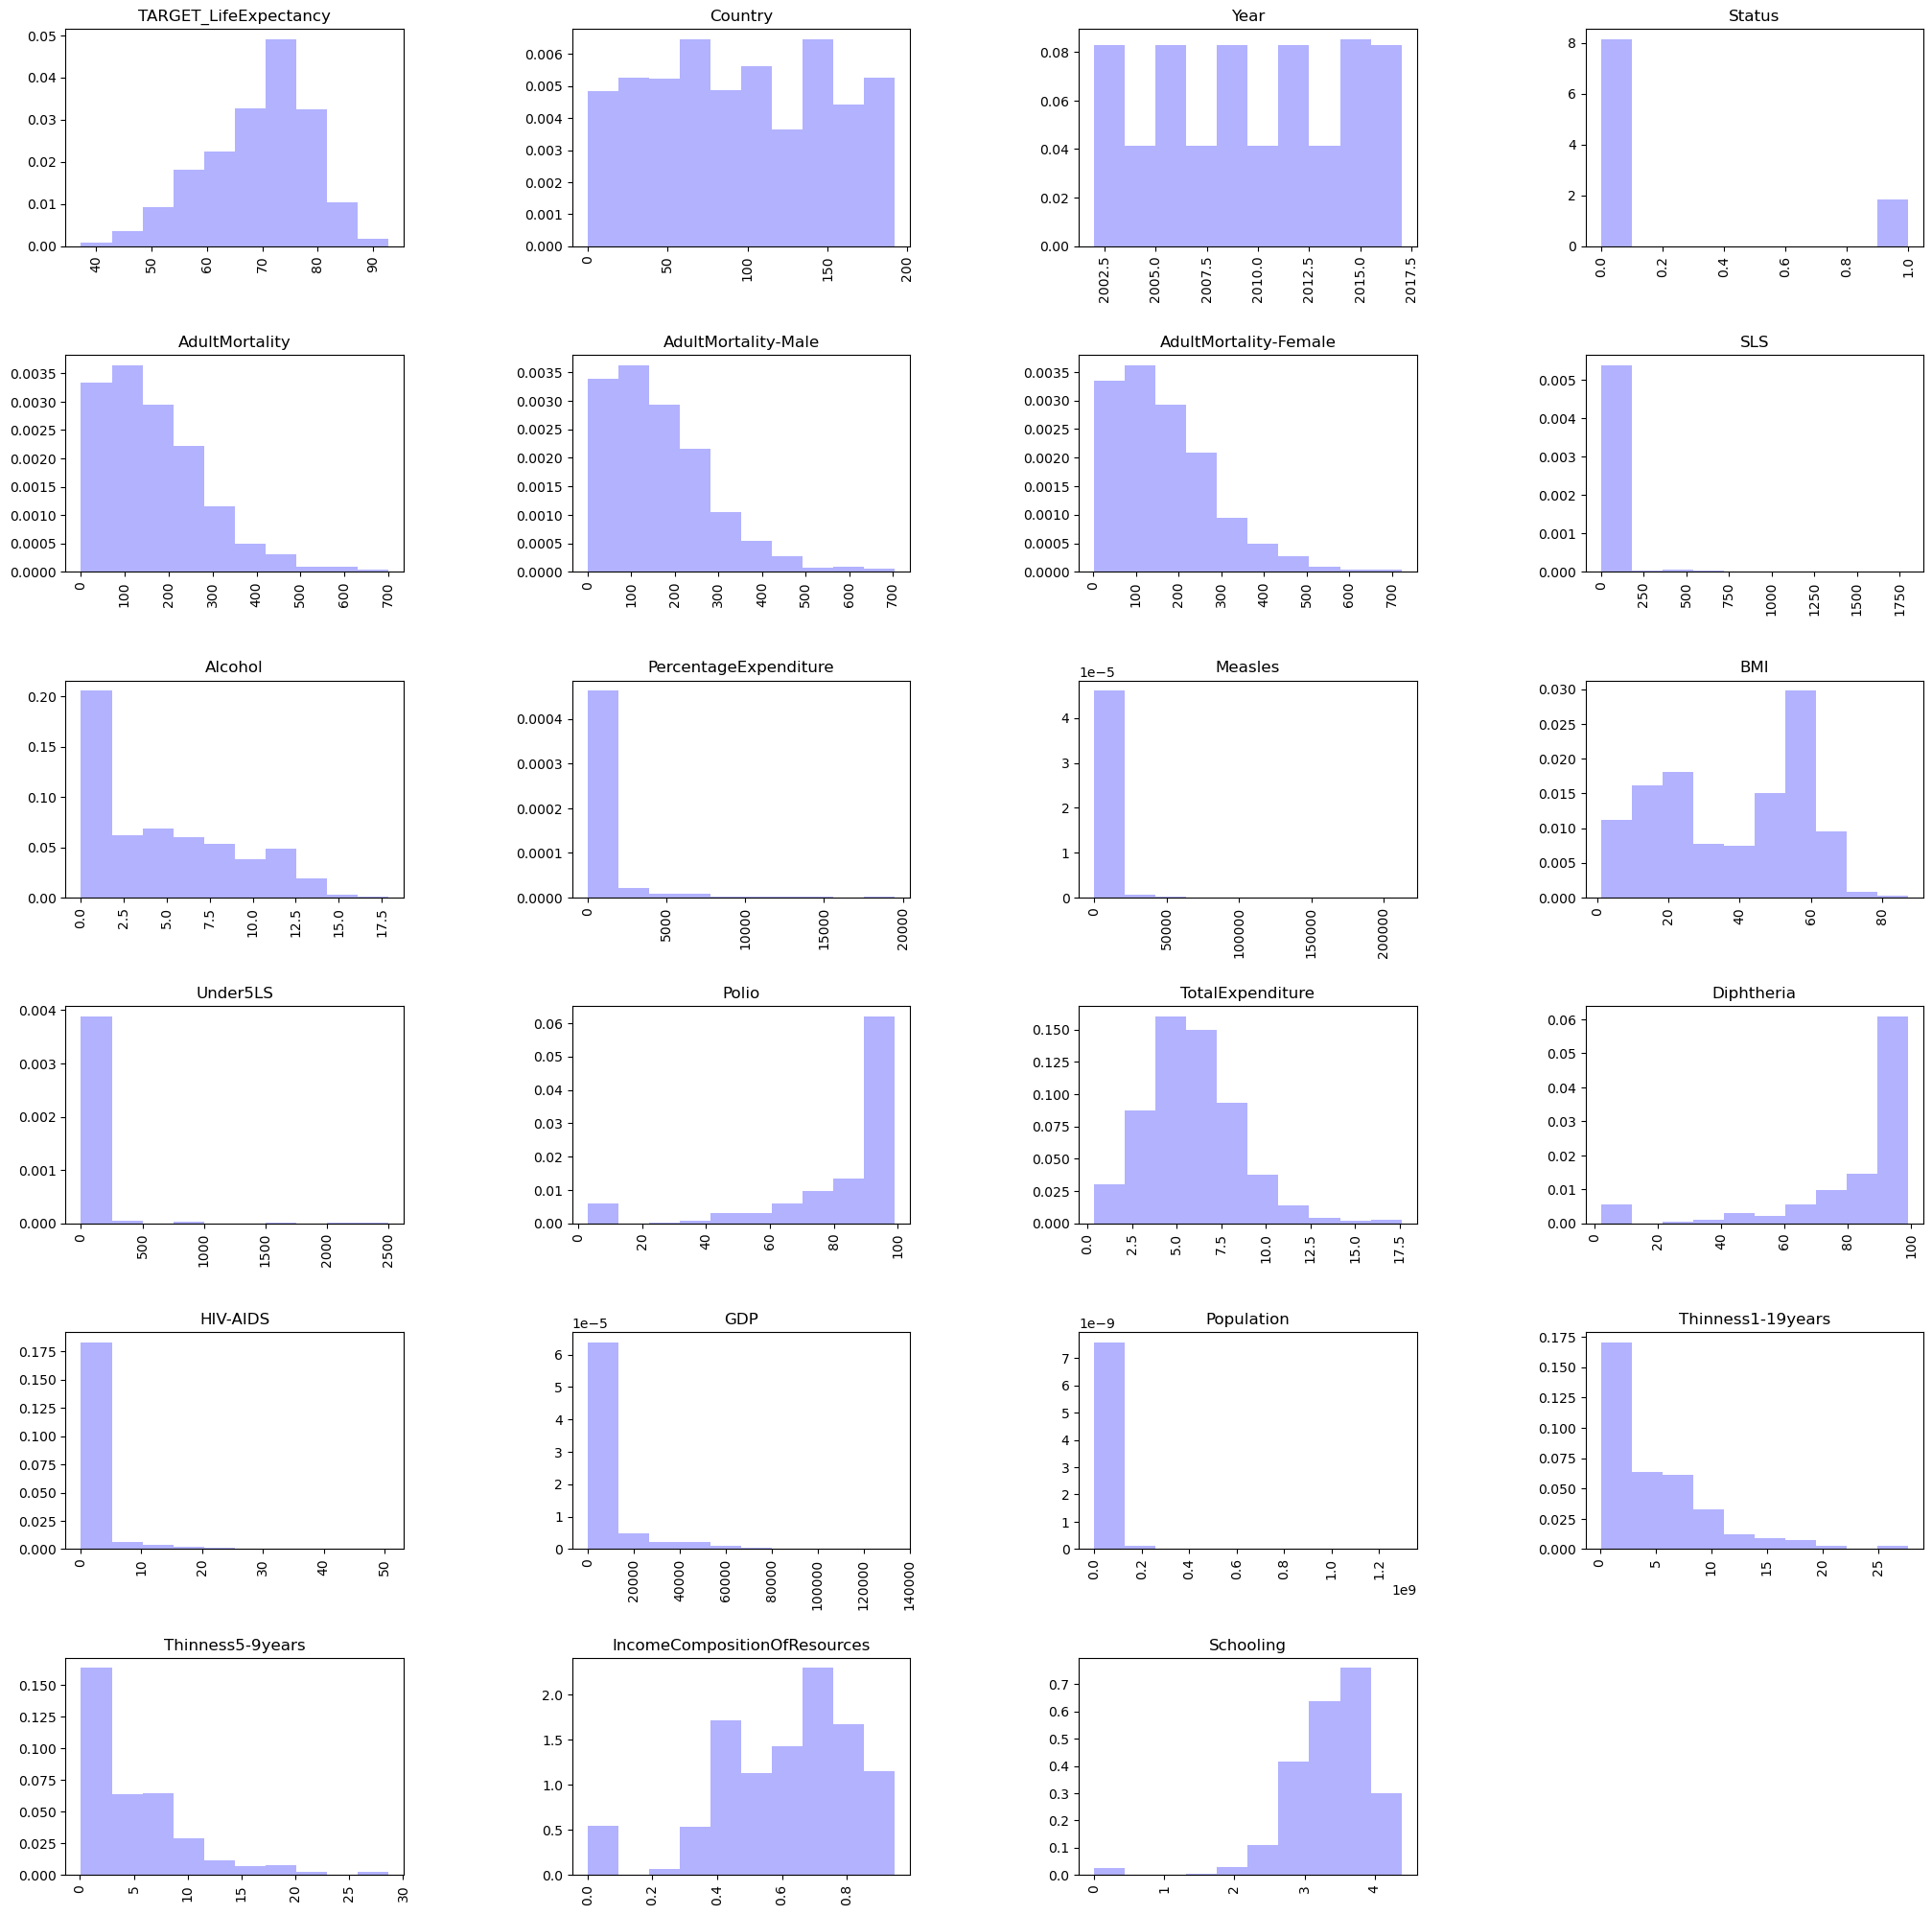

In [9]:
# examine the distribution of the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 25))

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(data.columns):
    plt.subplot(6,4, i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.show()

In [10]:
data['Measles']

ID
1        1154
2         492
3         430
4        2787
5        3013
        ...  
2067       35
2068      881
2069    25036
2070    16997
2071    30930
Name: Measles, Length: 2071, dtype: int64

#### Box plot of Life Expectancy 

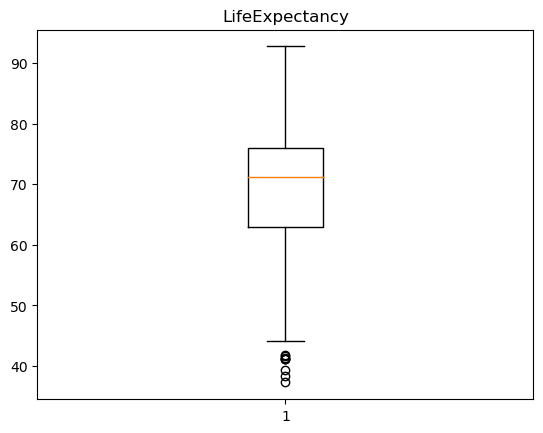

In [11]:
# box plot the target - life expectancy
plt.boxplot(data['TARGET_LifeExpectancy'])
plt.title('LifeExpectancy')
plt.show()

#### Examine correlation between each feature and the target through scatter plot

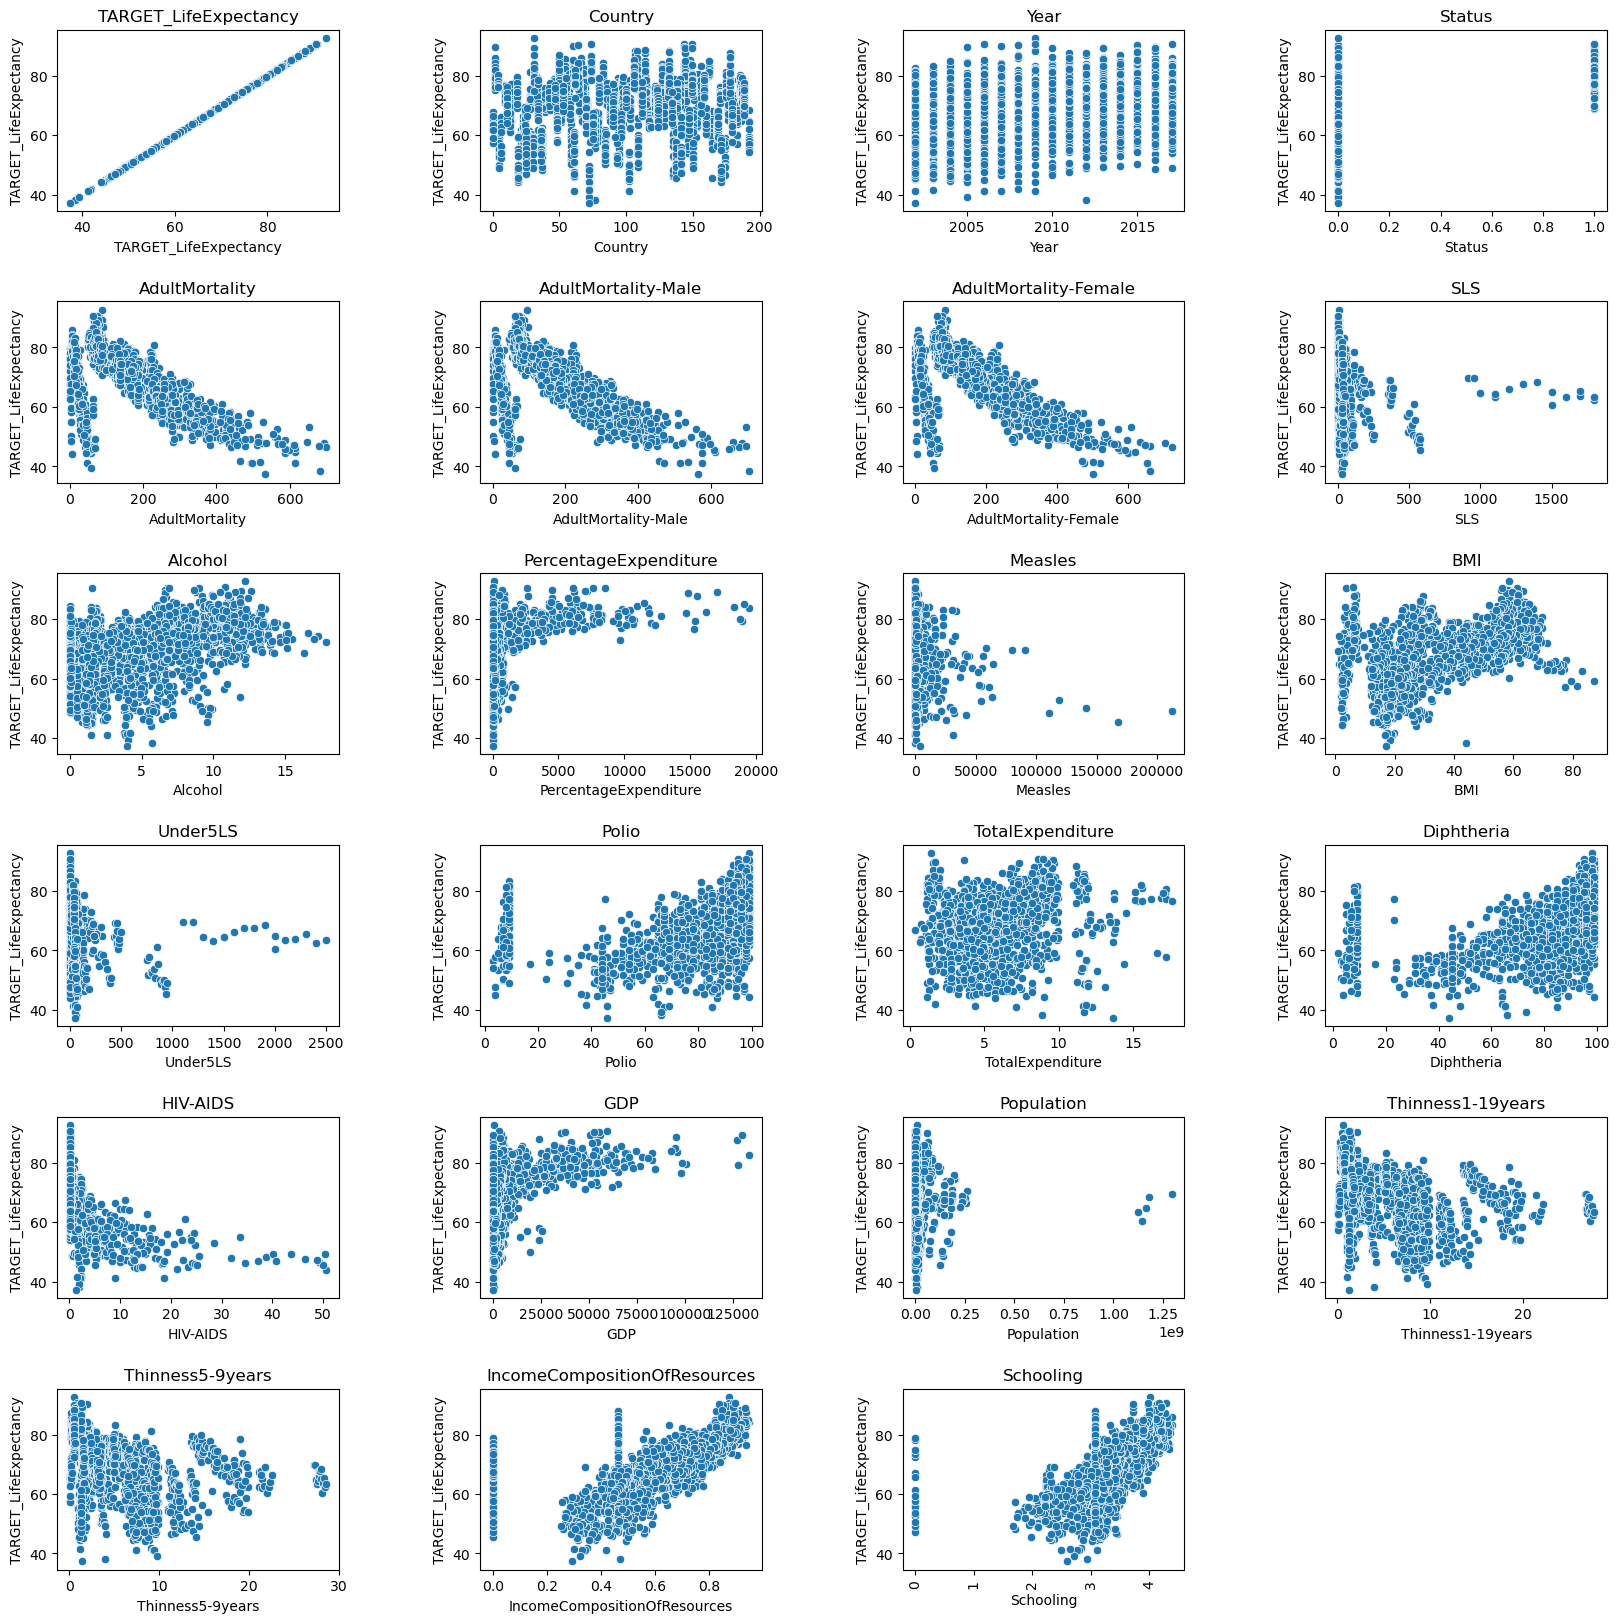

In [12]:
# scatter plot for attributes and target
import seaborn as sns
plt.figure(figsize=(20,20))

plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i, col in enumerate(data.columns):
    plt.subplot(6,4,i+1)
    sns.scatterplot(x=data[col], y=data['TARGET_LifeExpectancy'])
    plt.title(col)
    
    
plt.xticks(rotation='vertical')
plt.show()

Relationship between target variable and categorical attributes can be examined using boxplot. Below is box plot plottted to examine relationship between status and life expectancy.

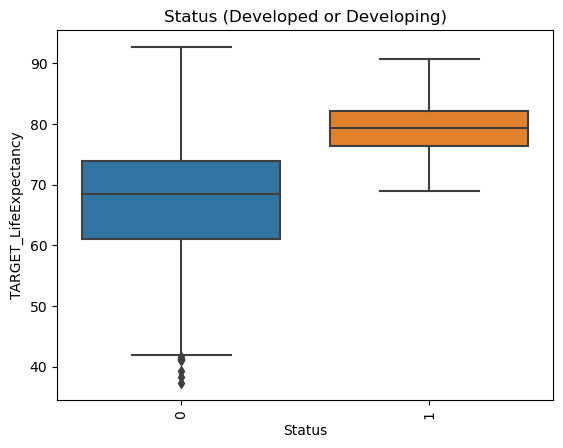

In [13]:
# box plot of categorical value
ax = sns.boxplot(x=data['Status'], y=data['TARGET_LifeExpectancy'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Status (Developed or Developing)')

plt.xticks(rotation='vertical')
plt.show()


Correlation heatmap for numerical data


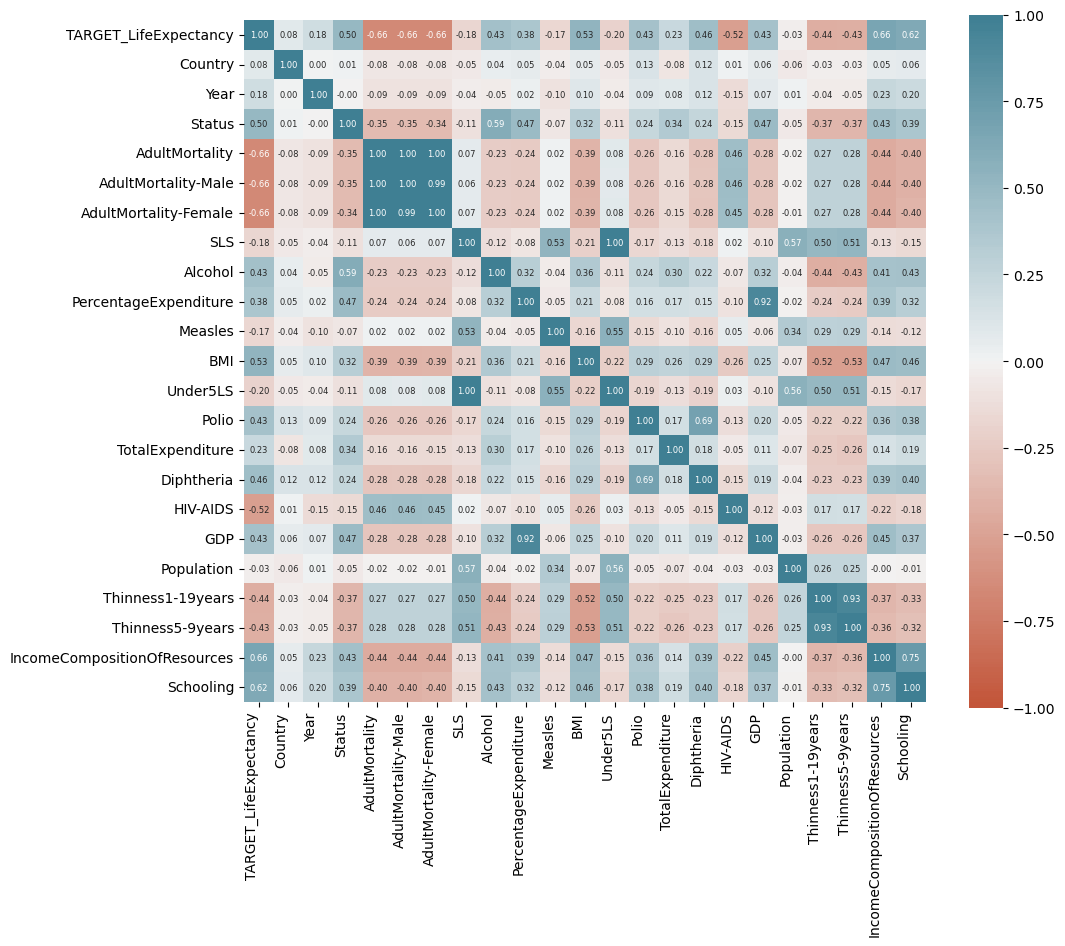

In [14]:
# correlation heatmap 
f, ax = plt.subplots(figsize=(11, 9))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, # Add annotations
    fmt=".2f",   # Format for annotations (2 decimal places)
    annot_kws={"size": 6}  # Annotation font size
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [15]:
print(corr)

                              TARGET_LifeExpectancy   Country      Year  \
TARGET_LifeExpectancy                      1.000000  0.080722  0.181780   
Country                                    0.080722  1.000000  0.000582   
Year                                       0.181780  0.000582  1.000000   
Status                                     0.504971  0.011727 -0.001923   
AdultMortality                            -0.663425 -0.077161 -0.089279   
AdultMortality-Male                       -0.662934 -0.077147 -0.088935   
AdultMortality-Female                     -0.661136 -0.076852 -0.089250   
SLS                                       -0.179600 -0.051968 -0.035658   
Alcohol                                    0.433071  0.042809 -0.045756   
PercentageExpenditure                      0.378189  0.054864  0.023588   
Measles                                   -0.168519 -0.038347 -0.095634   
BMI                                        0.531665  0.049637  0.095700   
Under5LS                 

## Feature Scaling and Normalisation

Encode the categorical attributes

In [16]:
# encode the categorical attribute - Country
raw_data = data.copy()

from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_country = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_country.fit(data[['Country']])

onehot_ = OneHotEncoder_country.transform(data[['Country']]).toarray()

print(onehot_.shape, OneHotEncoder_country.categories_)

(2071, 136) [array([  0,   2,   4,   5,   6,   9,  11,  13,  14,  15,  18,  19,  21,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  33,  34,  36,  37,
        39,  42,  43,  44,  46,  47,  48,  50,  51,  53,  54,  55,  57,
        58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  77,  79,  80,  83,  84,  85,  86,  88,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 100, 102, 103, 106, 107,
       108, 109, 111, 112, 114, 115, 117, 119, 122, 123, 124, 127, 128,
       131, 132, 134, 135, 136, 137, 138, 140, 141, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 156, 157, 158, 160, 162,
       164, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 182, 183,
       184, 185, 186, 187, 188, 192], dtype=int64)]


In [17]:
# create new columns for categorical attribute
colName = 'Country'
for i in range(len(OneHotEncoder_country.categories_[0])):
    data[colName + '_' + str(OneHotEncoder_country.categories_[0][i])] = onehot_[:,i]
    
data.head()

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\4127229714.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[colName + '_' + str(OneHotEncoder_country.categories_[0][i])] = onehot_[:,i]
C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\4127229714.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[colName + '_' + str(OneHotEncoder_country.categories_[0][i])] = onehot_[:,i]
C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\4127229714.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

,TARGET_LifeExpectancy,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,...,Country_178,Country_179,Country_182,Country_183,Country_184,Country_185,Country_186,Country_187,Country_188,Country_192
ID,,,,,,,,,,,,,,,,,,,,,
1,67.1,146,2017,0,263,262,264,62,0.01,71.279624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.8,146,2016,0,271,278,264,64,0.01,73.523582,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57.6,146,2015,0,268,246,290,66,0.01,73.219243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55.5,146,2014,0,272,248,296,69,0.01,78.184215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,57.7,146,2013,0,275,278,272,71,0.01,7.097109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# drop the original country column
data = data.drop(['Country'], axis=1)
data.head()

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Country_178,Country_179,Country_182,Country_183,Country_184,Country_185,Country_186,Country_187,Country_188,Country_192
ID,,,,,,,,,,,,,,,,,,,,,
1,67.1,2017,0,263,262,264,62,0.01,71.279624,1154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,59.8,2016,0,271,278,264,64,0.01,73.523582,492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,57.6,2015,0,268,246,290,66,0.01,73.219243,430,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55.5,2014,0,272,248,296,69,0.01,78.184215,2787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,57.7,2013,0,275,278,272,71,0.01,7.097109,3013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# features scaling and normalisation for test set
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_country = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_country.fit(test[['Country']])

onehot_ = OneHotEncoder_country.transform(test[['Country']]).toarray()

print(onehot_.shape, OneHotEncoder_country.categories_)
colName = 'Country'
for i in range(len(OneHotEncoder_country.categories_[0])):
    test[colName + '_' + str(OneHotEncoder_country.categories_[0][i])] = onehot_[:,i]
    
test.head()

(867, 57) [array([  1,   3,   7,   8,  10,  12,  16,  17,  20,  22,  32,  35,  38,
        40,  41,  45,  49,  52,  56,  63,  76,  78,  81,  82,  87,  89,
        99, 101, 104, 105, 110, 113, 116, 118, 120, 121, 125, 126, 129,
       130, 133, 139, 142, 155, 159, 161, 163, 165, 166, 167, 172, 177,
       180, 181, 189, 190, 191], dtype=int64)]


,Country,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Country_165,Country_166,Country_167,Country_172,Country_177,Country_180,Country_181,Country_189,Country_190,Country_191
ID,,,,,,,,,,,,,,,,,,,,,
1,120,2017,0,335,314,356,66,6.35,0.000000,118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,120,2016,0,348,338,358,67,8.33,23.965612,11699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,120,2015,0,355,362,348,69,8.10,35.958573,8523,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,120,2014,0,358,348,368,72,8.24,256.122524,4458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,120,2013,0,361,368,354,75,8.06,239.891392,1449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
test = test.drop(['Country'], axis=1)
test.head()

,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Country_165,Country_166,Country_167,Country_172,Country_177,Country_180,Country_181,Country_189,Country_190,Country_191
ID,,,,,,,,,,,,,,,,,,,,,
1,2017,0,335,314,356,66,6.35,0.000000,118,23.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016,0,348,338,358,67,8.33,23.965612,11699,22.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0,355,362,348,69,8.10,35.958573,8523,22.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,0,358,348,368,72,8.24,256.122524,4458,21.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013,0,361,368,354,75,8.06,239.891392,1449,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# get the columns in test but not in train set to insert to train data
differences_country = test.columns.difference(data.columns).tolist()

print(differences_country)

['Country_1', 'Country_10', 'Country_101', 'Country_104', 'Country_105', 'Country_110', 'Country_113', 'Country_116', 'Country_118', 'Country_12', 'Country_120', 'Country_121', 'Country_125', 'Country_126', 'Country_129', 'Country_130', 'Country_133', 'Country_139', 'Country_142', 'Country_155', 'Country_159', 'Country_16', 'Country_161', 'Country_163', 'Country_165', 'Country_166', 'Country_167', 'Country_17', 'Country_172', 'Country_177', 'Country_180', 'Country_181', 'Country_189', 'Country_190', 'Country_191', 'Country_20', 'Country_22', 'Country_3', 'Country_32', 'Country_35', 'Country_38', 'Country_40', 'Country_41', 'Country_45', 'Country_49', 'Country_52', 'Country_56', 'Country_63', 'Country_7', 'Country_76', 'Country_78', 'Country_8', 'Country_81', 'Country_82', 'Country_87', 'Country_89', 'Country_99']


In [22]:
# assign these columns to 0
for col in differences_country:
    data[col] = 0
    
data.head()

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\629279491.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = 0
C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\629279491.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[col] = 0
C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\629279491.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.

,TARGET_LifeExpectancy,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,...,Country_63,Country_7,Country_76,Country_78,Country_8,Country_81,Country_82,Country_87,Country_89,Country_99
ID,,,,,,,,,,,,,,,,,,,,,
1,67.1,2017,0,263,262,264,62,0.01,71.279624,1154,...,0,0,0,0,0,0,0,0,0,0
2,59.8,2016,0,271,278,264,64,0.01,73.523582,492,...,0,0,0,0,0,0,0,0,0,0
3,57.6,2015,0,268,246,290,66,0.01,73.219243,430,...,0,0,0,0,0,0,0,0,0,0
4,55.5,2014,0,272,248,296,69,0.01,78.184215,2787,...,0,0,0,0,0,0,0,0,0,0
5,57.7,2013,0,275,278,272,71,0.01,7.097109,3013,...,0,0,0,0,0,0,0,0,0,0


In [23]:
data['Country_1']

ID
1       0
2       0
3       0
4       0
5       0
       ..
2067    0
2068    0
2069    0
2070    0
2071    0
Name: Country_1, Length: 2071, dtype: int64

In [24]:
# the same on test data
differences_country_ = data.columns.difference(test.columns).tolist()
print(differences_country_)

['Country_0', 'Country_100', 'Country_102', 'Country_103', 'Country_106', 'Country_107', 'Country_108', 'Country_109', 'Country_11', 'Country_111', 'Country_112', 'Country_114', 'Country_115', 'Country_117', 'Country_119', 'Country_122', 'Country_123', 'Country_124', 'Country_127', 'Country_128', 'Country_13', 'Country_131', 'Country_132', 'Country_134', 'Country_135', 'Country_136', 'Country_137', 'Country_138', 'Country_14', 'Country_140', 'Country_141', 'Country_143', 'Country_144', 'Country_145', 'Country_146', 'Country_147', 'Country_148', 'Country_149', 'Country_15', 'Country_150', 'Country_151', 'Country_152', 'Country_153', 'Country_154', 'Country_156', 'Country_157', 'Country_158', 'Country_160', 'Country_162', 'Country_164', 'Country_168', 'Country_169', 'Country_170', 'Country_171', 'Country_173', 'Country_174', 'Country_175', 'Country_176', 'Country_178', 'Country_179', 'Country_18', 'Country_182', 'Country_183', 'Country_184', 'Country_185', 'Country_186', 'Country_187', '

In [25]:
for col in differences_country_:
    test[col] = 0

test = test.drop(['TARGET_LifeExpectancy'], axis=1)
test.head()

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\2640813589.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\2640813589.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test[col] = 0
C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\2640813589.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Country_9,Country_90,Country_91,Country_92,Country_93,Country_94,Country_95,Country_96,Country_97,Country_98
ID,,,,,,,,,,,,,,,,,,,,,
1,2017,0,335,314,356,66,6.35,0.000000,118,23.3,...,0,0,0,0,0,0,0,0,0,0
2,2016,0,348,338,358,67,8.33,23.965612,11699,22.7,...,0,0,0,0,0,0,0,0,0,0
3,2015,0,355,362,348,69,8.10,35.958573,8523,22.1,...,0,0,0,0,0,0,0,0,0,0
4,2014,0,358,348,368,72,8.24,256.122524,4458,21.5,...,0,0,0,0,0,0,0,0,0,0
5,2013,0,361,368,354,75,8.06,239.891392,1449,21.0,...,0,0,0,0,0,0,0,0,0,0


### Data splits

In [26]:
from sklearn.model_selection import train_test_split

# using train test split with 80-20 ratio
with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(data, test_size=0.2, 
                                             shuffle=True,random_state=0)
    
print(train_data.shape[0], test_data.shape[0])

1656 415


In [27]:
print("Number of instances in the original dataset is {}. After splitting, Train has {} instances and test has {} instances."
      .format(data.shape[0], train_data.shape[0], test_data.shape[0]))

Number of instances in the original dataset is 2071. After splitting, Train has 1656 instances and test has 415 instances.


In [28]:
# split attributes and target
train_X = train_data.drop(['TARGET_LifeExpectancy',], axis=1)
train_y = train_data[['TARGET_LifeExpectancy']]

test_X = test_data.drop(['TARGET_LifeExpectancy',], axis=1)
test_y = test_data[['TARGET_LifeExpectancy']]

### Carry out data normalisation and transformation

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

logNorm_attributes = ['AdultMortality','AdultMortality-Male','AdultMortality-Female','Alcohol','PercentageExpenditure',
                      'Polio','Diphtheria', 'HIV-AIDS','Population', 'GDP','Thinness1-19years','Thinness5-9years']
minmax_attributes = ['Year', 'SLS','Measles','BMI','Under5LS','TotalExpenditure','IncomeCompositionOfResources','Schooling']
columns =train_X.columns

# feature scaling using MinMaxScaler
minmaxscaler = MinMaxScaler().fit(train_X.loc[:, minmax_attributes])
train_X.loc[:, minmax_attributes] = minmaxscaler.transform(train_X.loc[:, minmax_attributes])
test_X.loc[:, minmax_attributes] = minmaxscaler.transform(test_X.loc[:, minmax_attributes])

# feature scaling using LogNormalisation
powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_X.loc[:, logNorm_attributes])
train_X.loc[:, logNorm_attributes] = powertransformer.transform(train_X.loc[:, logNorm_attributes])
test_X.loc[:, logNorm_attributes] = powertransformer.transform(test_X.loc[:, logNorm_attributes])

minmaxscaler_pt = MinMaxScaler().fit(train_X.loc[:, logNorm_attributes])
train_X.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(train_X.loc[:, logNorm_attributes])
test_X.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(test_X.loc[:, logNorm_attributes])


Features scaling and normalisation for test data

In [30]:
# feature scaling using MinMaxScaler
test.loc[:, minmax_attributes] = minmaxscaler.transform(test.loc[:, minmax_attributes])

# feature scaling using LogNormalisation
test.loc[:, logNorm_attributes] = powertransformer.transform(test.loc[:, logNorm_attributes])
test.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(test.loc[:, logNorm_attributes])

### Checking if both splits are identically distributed

In [31]:
print(train_X.shape)

(1656, 214)


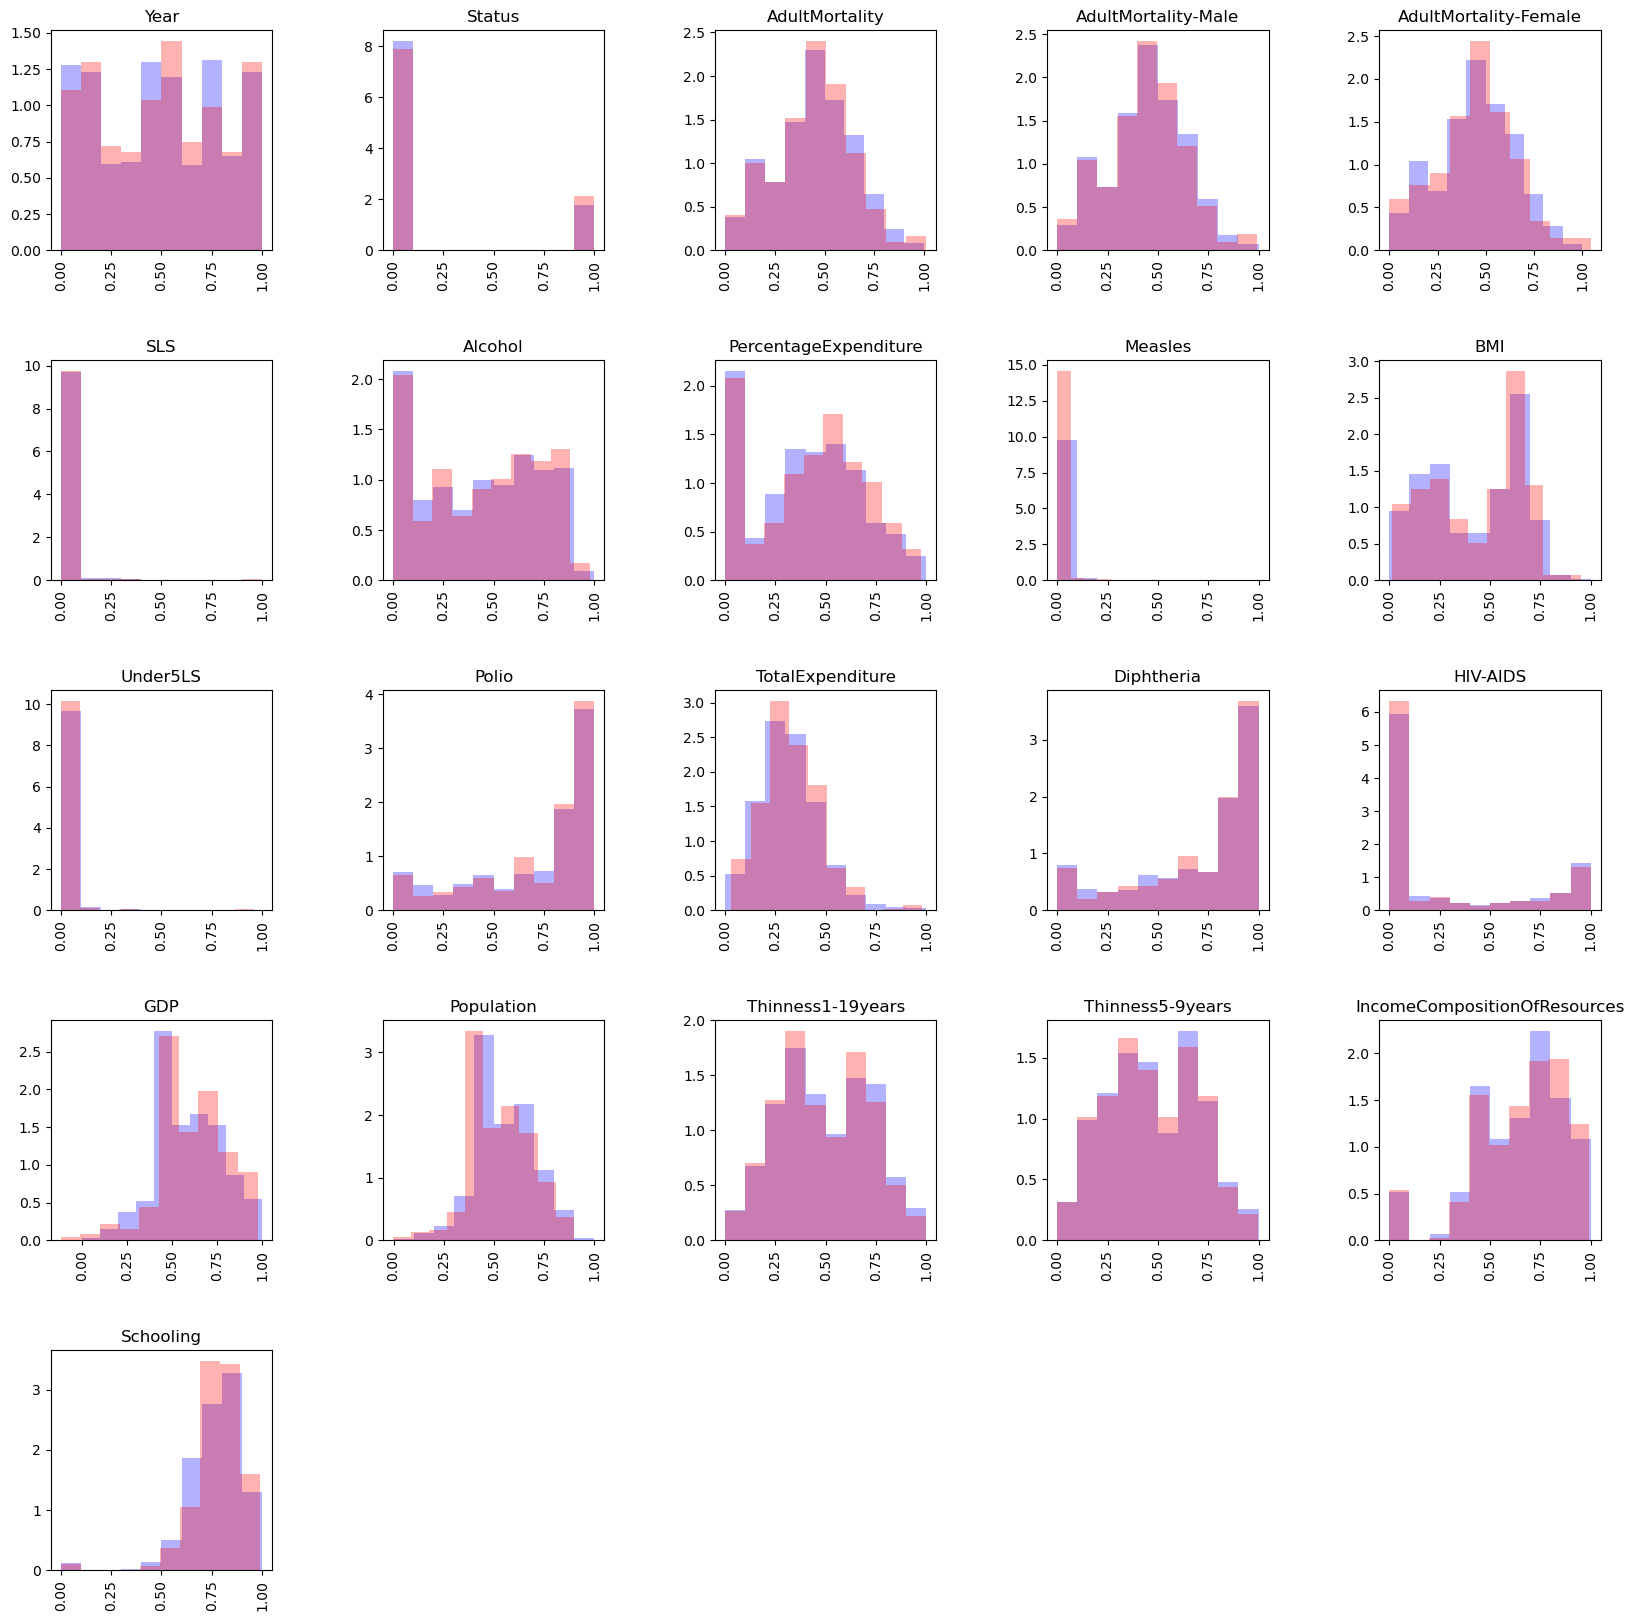

In [32]:
plt.figure(figsize=(20,20))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i, col in enumerate(raw_data.drop(['TARGET_LifeExpectancy','Country'], axis=1).columns):
    plt.subplot(5,5,i+1)
    plt.hist(train_X[col], alpha=0.3, color='b', density=True)
    plt.hist(test_X[col], alpha=0.3, color='r', density=True)    
    plt.title(col)
    plt.xticks(rotation='vertical')

### Baseline model - Linear Regression model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score

model = LinearRegression()
model.fit(train_X, train_y)

# MSE on training dataset
pred_train_y = model.predict(train_X)
mse_train = mean_squared_error(train_y, pred_train_y)

# MSE on test dataset
pred_test_y = model.predict(test_X)
mse_test = mean_squared_error(test_y, pred_test_y)

#  MAE on training dataset and test dataset
mae_train = mean_absolute_error(train_y, pred_train_y)
mae_test = mean_absolute_error(test_y, pred_test_y)

# R2 score on training and test dataset
r2_train = r2_score(train_y, pred_train_y)
r2_test = r2_score(test_y, pred_test_y)

# generalization gap when using Linear Regression model
generalization_gap = mse_train - mse_test

print("Mean squared error of Linear Regression on training set:", mse_train)
print("Mean squared error of Linear Regression on testing set:", mse_test)
print("Mean absolute error of Linear Regression on training set:", mae_train)
print("Mean absolute error of Linear Regression on testing set:", mae_test)
print("R2 score of Linear Regression on training set:", r2_train)
print("R2 score of Linear Regression on testing set:", r2_test)


Mean squared error of Linear Regression on training set: 7.527510688811684
Mean squared error of Linear Regression on testing set: 1.2685349348951673e+23
Mean absolute error of Linear Regression on training set: 2.0825092702672103
Mean absolute error of Linear Regression on testing set: 22019384931.878426
R2 score of Linear Regression on training set: 0.9172659821616715
R2 score of Linear Regression on testing set: -1.4921506306449335e+21


In [34]:
print(pred_train_y)

[[59.33837891]
 [75.15820312]
 [78.02539062]
 ...
 [72.77832031]
 [84.25488281]
 [41.1015625 ]]


C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\3075771564.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(test_y, pred_test_y, s=25, cmap=plt.cm.coolwarm, zorder=10)
C:\Users\nnkl2\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


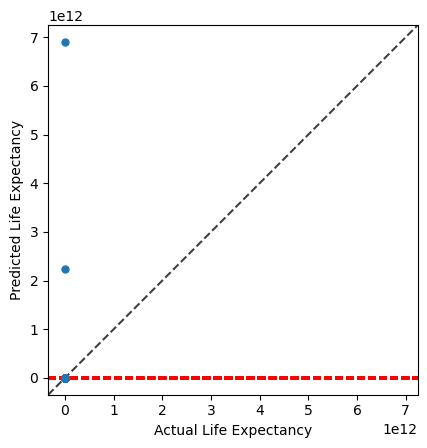

In [35]:
# plot Linear Regression prediction on test set 
fig, ax = plt.subplots()
ax.scatter(test_y, pred_test_y, s=25, cmap=plt.cm.coolwarm, zorder=10)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.plot(lims, [np.mean(train_X),]*2, 'r--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')

plt.show()

### Ridge Regression -  L2 Regularision on Linear Regression 


In [36]:
test_X

,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Country_63,Country_7,Country_76,Country_78,Country_8,Country_81,Country_82,Country_87,Country_89,Country_99
ID,,,,,,,,,,,,,,,,,,,,,
1692,0.666667,0,0.729051,0.742192,0.716681,0.015000,0.102008,0.000000,0.000000,0.191194,...,0,0,0,0,0,0,0,0,0,0
1198,0.200000,0,0.400163,0.396264,0.408308,0.000000,0.279534,0.616072,0.000353,0.181924,...,0,0,0,0,0,0,0,0,0,0
1095,0.666667,0,0.634213,0.634546,0.636658,0.005000,0.449000,0.368994,0.010368,0.272306,...,0,0,0,0,0,0,0,0,0,0
311,0.600000,0,0.647040,0.658944,0.636658,0.024444,0.511149,0.434150,0.255053,0.174971,...,0,0,0,0,0,0,0,0,0,0
1767,1.000000,1,0.252963,0.253099,0.257269,0.000000,0.778572,0.000000,0.000165,0.653534,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.866667,0,0.478308,0.489808,0.469494,0.001111,0.444568,0.586107,0.000000,0.595597,...,0,0,0,0,0,0,0,0,0,0
1781,0.066667,1,0.321777,0.316469,0.331517,0.000000,0.809399,0.883598,0.003299,0.582851,...,0,0,0,0,0,0,0,0,0,0
1176,0.600000,0,0.434923,0.425231,0.448865,0.001667,0.098330,0.602777,0.000721,0.387022,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.linear_model import Ridge

# initialize Ridge model
model = Ridge()
model.fit(train_X, train_y)

# Calculate mean squared error (MSE) on training data
pred_train_y = model.predict(train_X)
mse_train = mean_squared_error(train_y, pred_train_y)

# Calculate mean squared error (MSE) on testing data
y_test_pred = model.predict(test_X)
mse_test = mean_squared_error(test_y, y_test_pred)

# Calculate generalization gap
generalization_gap = mse_train - mse_test

print("Mean Squared Error (Training):", mse_train)
print("Mean Squared Error (Test):", mse_test)
print("Generalization Gap:", generalization_gap)
print("Value of Alpha in Ridge regression:", model.alpha)
y_pred = model.predict(test_X)

Mean Squared Error (Training): 8.52042363146778
Mean Squared Error (Test): 9.329867263269467
Generalization Gap: -0.8094436318016864
Value of Alpha in Ridge regression: 1.0


Applying Ridge Regression with Cross Validation

In [38]:
from sklearn.model_selection import GridSearchCV
ridge_model = Ridge()
hyperParameters = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
}
ridgeRegressor = GridSearchCV(model, hyperParameters, scoring='neg_mean_squared_error',cv=5) # using 5 folds
ridgeRegressor.fit(train_X, train_y)


C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.48276e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.28934e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.59792e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.23536e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [39]:
print('Best value for lambda:', ridgeRegressor.best_params_)
print('Best score for cost function:', ridgeRegressor.best_score_)

Best value for lambda: {'alpha': 0.001}
Best score for cost function: -9.898402213680557


In [40]:
test_X

,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Country_63,Country_7,Country_76,Country_78,Country_8,Country_81,Country_82,Country_87,Country_89,Country_99
ID,,,,,,,,,,,,,,,,,,,,,
1692,0.666667,0,0.729051,0.742192,0.716681,0.015000,0.102008,0.000000,0.000000,0.191194,...,0,0,0,0,0,0,0,0,0,0
1198,0.200000,0,0.400163,0.396264,0.408308,0.000000,0.279534,0.616072,0.000353,0.181924,...,0,0,0,0,0,0,0,0,0,0
1095,0.666667,0,0.634213,0.634546,0.636658,0.005000,0.449000,0.368994,0.010368,0.272306,...,0,0,0,0,0,0,0,0,0,0
311,0.600000,0,0.647040,0.658944,0.636658,0.024444,0.511149,0.434150,0.255053,0.174971,...,0,0,0,0,0,0,0,0,0,0
1767,1.000000,1,0.252963,0.253099,0.257269,0.000000,0.778572,0.000000,0.000165,0.653534,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.866667,0,0.478308,0.489808,0.469494,0.001111,0.444568,0.586107,0.000000,0.595597,...,0,0,0,0,0,0,0,0,0,0
1781,0.066667,1,0.321777,0.316469,0.331517,0.000000,0.809399,0.883598,0.003299,0.582851,...,0,0,0,0,0,0,0,0,0,0
1176,0.600000,0,0.434923,0.425231,0.448865,0.001667,0.098330,0.602777,0.000721,0.387022,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# evaluate the Ridge model with the best param
pred_test_y = ridgeRegressor.predict(test_X)
mse = mean_squared_error(test_y, pred_test_y)
print("Mean squared error of hyperparameter tuned Ridge:", mse)

Mean squared error of hyperparameter tuned Ridge: 8.069011035381926


### Residual plots for Ridge

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\2537439518.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(test_y, test_y-pred_test_y, s=25, cmap=plt.cm.coolwarm, zorder=10)


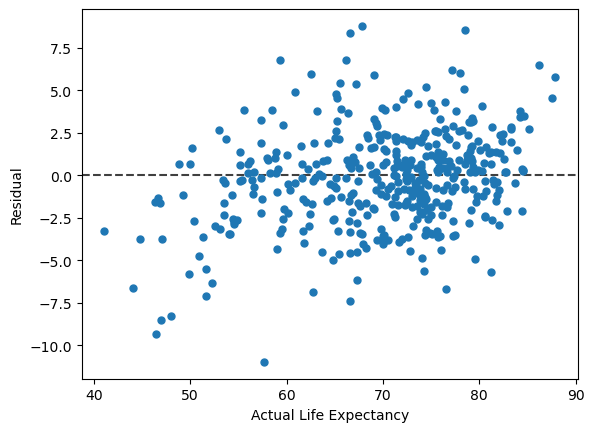

In [42]:
fig, ax = plt.subplots()
ax.scatter(test_y, test_y-pred_test_y, s=25, cmap=plt.cm.coolwarm, zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residual')

plt.show()

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\14755542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_y-y_test_pred)


<Axes: ylabel='Density'>

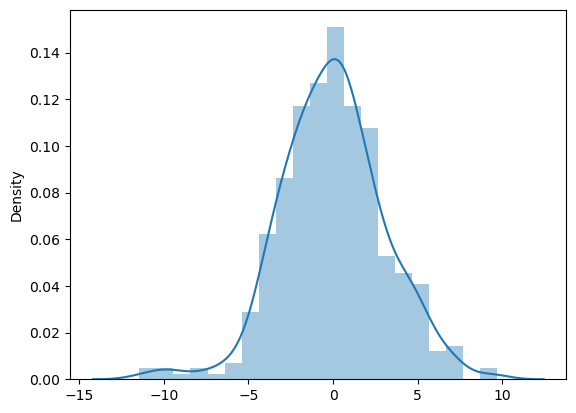

In [43]:
# distribution plot for test predictions
import seaborn as sns
sns.distplot(test_y-y_test_pred)

### Lasso Regression

In [44]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(train_X, train_y)

# Calculate mean squared error (MSE) on training data
pred_train_y = model.predict(train_X)
mse_train = mean_squared_error(train_y, pred_train_y)

# Calculate mean squared error (MSE) on testing data
y_test_pred = model.predict(test_X)
mse_test = mean_squared_error(test_y, y_test_pred)

# Calculate generalization gap
generalization_gap = mse_train - mse_test

print("Mean Squared Error (Lasso - Train):", mse_train)
print("Mean Squared Error (Lasso - Test):", mse_test)
print("Generalization Gap:", generalization_gap)
print("Value of Alpha in Lasso regression:", model.alpha)
y_pred = model.predict(test_X)

Mean Squared Error (Lasso - Train): 43.540181020303464
Mean Squared Error (Lasso - Test): 39.93934801840146
Generalization Gap: 3.6008330019020036
Value of Alpha in Lasso regression: 1.0


In [45]:
from sklearn.linear_model import Lasso
LassoRegression = Lasso()
hyperParameters = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(train_X, train_y)

C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.971e+03, tolerance: 1.182e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.055e+03, tolerance: 1.224e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\nnkl2\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.597e+03, toleranc

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [46]:
print("Best alpha value for Lasso:", LassoRegressor.best_params_)
print("Best score for the cost function:", LassoRegressor.best_score_)

Best alpha value for Lasso: {'alpha': 1e-15}
Best score for the cost function: -9.944072942180213


In [47]:
pred_test_y = LassoRegressor.predict(test_X)
mse = mean_squared_error(test_y, pred_test_y)
print("Mean squared error of Lasso Regression on test set:", mse)

Mean squared error of Lasso Regression on test set: 8.137335423538005


In [48]:
pred_test_y.shape

(415,)

In [49]:
pred_test_y=pred_test_y.reshape(415,1)

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\1273356660.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(test_y, test_y-pred_test_y, s=25, cmap=plt.cm.coolwarm, zorder=10)


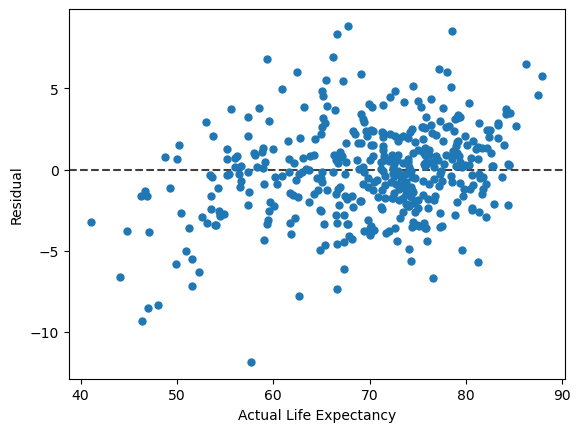

In [50]:
# residual plot for Lasso Regressor
fig, ax = plt.subplots()
ax.scatter(test_y, test_y-pred_test_y, s=25, cmap=plt.cm.coolwarm, zorder=10)

xlims = ax.get_xlim()
ax.plot(xlims, [0.0,]*2, 'k--', alpha=0.75, zorder=0)
ax.set_xlim(xlims)

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Residual')

plt.show()

C:\Users\nnkl2\AppData\Local\Temp\ipykernel_28548\3847082340.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_y-pred_test_y)


<Axes: ylabel='Density'>

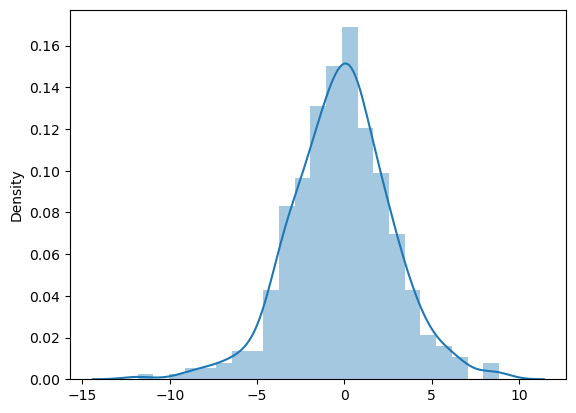

In [51]:
import seaborn as sns

sns.distplot(test_y-pred_test_y)

## Predict for the test set 

In [52]:
test.head()

,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Country_9,Country_90,Country_91,Country_92,Country_93,Country_94,Country_95,Country_96,Country_97,Country_98
ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0,0.704275,0.676081,0.735740,0.036667,0.613164,0.000000,0.000556,0.258401,...,0,0,0,0,0,0,0,0,0,0
2,0.933333,0,0.717811,0.700922,0.737825,0.037222,0.704341,0.314970,0.055136,0.251448,...,0,0,0,0,0,0,0,0,0,0
3,0.866667,0,0.724986,0.724824,0.727336,0.038333,0.694598,0.354071,0.040168,0.244496,...,0,0,0,0,0,0,0,0,0,0
4,0.800000,0,0.728037,0.710990,0.748152,0.040000,0.700552,0.549678,0.021010,0.237543,...,0,0,0,0,0,0,0,0,0,0
5,0.733333,0,0.731074,0.730665,0.733649,0.041667,0.692883,0.543041,0.006829,0.231750,...,0,0,0,0,0,0,0,0,0,0


In [53]:
test = test[test_X.columns]
pred_test = ridgeRegressor.predict(test)

In [54]:
pred_test.shape

(867, 1)

In [55]:
test['TARGET_LifeExpectancy'] = pred_test

In [56]:
test

,Year,Status,AdultMortality,AdultMortality-Male,AdultMortality-Female,SLS,Alcohol,PercentageExpenditure,Measles,BMI,...,Country_7,Country_76,Country_78,Country_8,Country_81,Country_82,Country_87,Country_89,Country_99,TARGET_LifeExpectancy
ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0,0.704275,0.676081,0.735740,0.036667,0.613164,0.000000,0.000556,0.258401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.354273
2,0.933333,0,0.717811,0.700922,0.737825,0.037222,0.704341,0.314970,0.055136,0.251448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.360063
3,0.866667,0,0.724986,0.724824,0.727336,0.038333,0.694598,0.354071,0.040168,0.244496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.792180
4,0.800000,0,0.728037,0.710990,0.748152,0.040000,0.700552,0.549678,0.021010,0.237543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.671293
5,0.733333,0,0.731074,0.730665,0.733649,0.041667,0.692883,0.543041,0.006829,0.231750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.916358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,0.266667,0,1.028790,0.975113,1.083630,0.015000,0.498888,0.000000,0.000146,0.302433,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.444853
864,0.200000,0,1.023244,1.025531,1.020547,0.014444,0.478798,0.000000,0.004703,0.297798,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.551219
865,0.133333,0,0.316994,0.321180,0.316980,0.013889,0.503445,0.000000,0.001433,0.293163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.151601


In [57]:
pred_results = pd.DataFrame()
test.reset_index(inplace=True)
pred_results[['ID', 'TARGET_LifeExpectancy']] = test[['ID','TARGET_LifeExpectancy']]

In [58]:
pred_results

,ID,TARGET_LifeExpectancy
0,1,67.354273
1,2,67.360063
2,3,66.792180
3,4,66.671293
4,5,65.916358
...,...,...
862,863,63.444853
863,864,62.551219
864,865,63.151601
865,866,62.612790


In [59]:
pred_results.to_csv('s3927588.csv', index=False)